In [90]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.dates as mdates
%matplotlib inline

In [91]:
years = range(2000,2015)

pieces = []
columns = ['When Reported','Offense Code','location']

for year in years:
    path = 'C:/Users/flunk_000/Desktop/CalPoly/StakeOut/%d.csv' % year
    frame = pd.read_csv(path, names=columns, header = True)

    pieces.append(frame)

crimeData = pd.concat(pieces, ignore_index=True)

#Total Crime/Day

In [92]:
for i in range(len(crimeData['location'])):
    if crimeData['location'][i] == 'LZ1':
        crimeData['location'][i]=1
    if crimeData['location'][i] =='LZ2':
        crimeData['location'][i]=2
    if crimeData['location'][i]=='LZ3':
        crimeData['location'][i]=3

In [93]:
crimeData['When Reported'] = [datetime.datetime.strptime(date, '%H:%M:%S %m/%d/%Y') for date in crimeData['When Reported']]

In [94]:
crimeData['When Reported'] = sorted(crimeData['When Reported'])

In [95]:
ts = pd.Series(crimeData['location'],index=crimeData['When Reported'])
ts[0:] = 1

In [96]:
byDay = ts.resample('D',how='sum')

# Total Crime/Day, by Zone 

In [97]:
z1 = crimeData.query('location == 1')
z2 = crimeData.query('location == 2')
z3 = crimeData.query('location == 3')

In [98]:
print('Total crime for zone 1:',len(z1));print('Total crime for zone 2:',len(z2));print('Total crime for zone 3:',(len(z3)))

('Total crime for zone 1:', 167318)
('Total crime for zone 2:', 176247)
('Total crime for zone 3:', 75107)


In [99]:
z1 = z1.reset_index();
z2 = z2.reset_index();
z3 = z3.reset_index();

In [100]:
del z1['index']
del z2['index']
del z3['index']

In [101]:
z1TS = pd.Series(z1['location'],index=z1['When Reported'])
z1TS[0:] = 1

z2TS = pd.Series(z1['location'],index=z2['When Reported'])
z2TS[0:] = 1

z3TS = pd.Series(z1['location'],index=z3['When Reported'])
z3TS[0:] = 1

In [102]:
z1TS = z1TS.resample('D',how='sum')
z2TS = z2TS.resample('D',how='sum')
z3TS = z3TS.resample('D',how='sum')

In [103]:
z1mean = round(np.mean(z1TS),2)
z1std = round(np.std(z1TS),2)

z2mean = round(np.mean(z2TS),2)
z2std = round(np.std(z2TS),2)

z3mean = round(np.mean(z3TS),2)
z3std = round(np.std(z3TS),2)

## Crime by Zone: Visualization

In [104]:
from matplotlib.gridspec import GridSpec

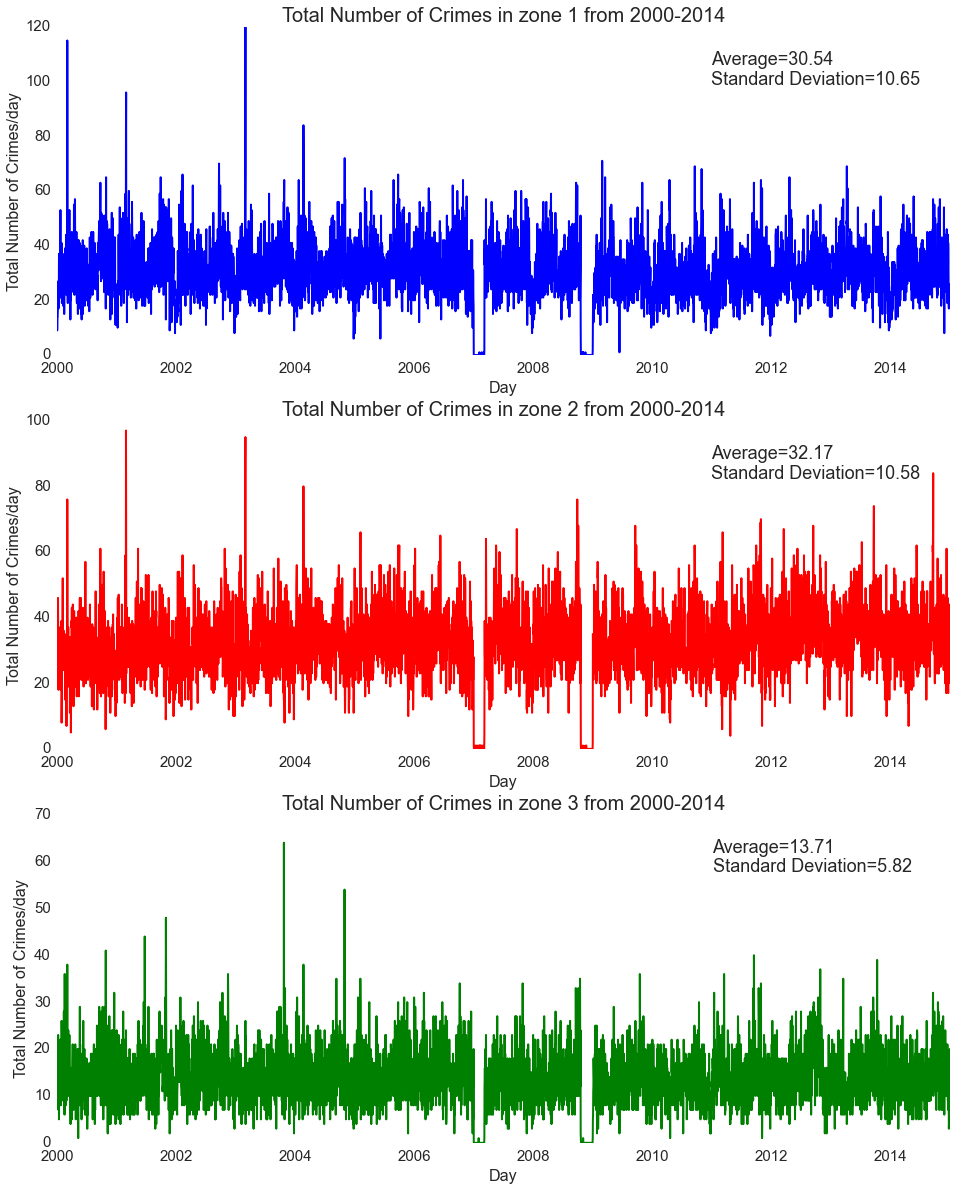

In [105]:
figure = plt.figure(figsize=(16,20))
gs = GridSpec(3,1)

z1plot = figure.add_subplot(gs[0,0])
z1plot =z1TS.plot(linewidth=2, c='blue')
z1plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z1plot.set_xlabel('Day',fontsize=16)
z1plot.set_title('Total Number of Crimes in zone 1 from 2000-2014',fontsize=20)
z1plot.tick_params(axis='both', labelsize=15)
z1plot.text(0.8, 0.9,'Average=%.2f' %z1mean, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18)
z1plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z1std, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18);

z2plot = figure.add_subplot(gs[1,0])
z2plot = z2TS.plot(linewidth=2, c='red')
z2plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z2plot.set_xlabel('Day',fontsize=16)
z2plot.set_title('Total Number of Crimes in zone 2 from 2000-2014',fontsize=20)
z2plot.tick_params(axis='both', labelsize=15)
z2plot.text(0.8, 0.9,'Average=%.2f' %z2mean, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18)
z2plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z2std, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18);

z3plot = figure.add_subplot(gs[2,0])
z3plot = z3TS.plot(linewidth=2, c='green')
z3plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z3plot.set_xlabel('Day',fontsize=16)
z3plot.set_title('Total Number of Crimes in zone 3 from 2000-2014',fontsize=20)
z3plot.tick_params(axis='both', labelsize=15)
z3plot.text(0.8, 0.9,'Average=%.2f' %z3mean, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18)
z3plot.text(0.846, 0.84,'Standard Deviation=%.2f' %z3std, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18);

##Crime by Zone: Harmonic Model 

In [106]:
def imabs(complexNum):
    return 2*abs(complexNum)/float(2048)

def imarg(complexNum):
    return math.atan2(complexNum.imag,complexNum.real)

def sine_wave(time,amp,freq,phi,damp):
    return ((math.exp(-1*damp*time))*
            (amp*math.cos(2*math.pi*freq*time+phi)))

In [107]:
ffts = {'1stWindow': np.fft.fft(z2TS[3431:5479])}

In [108]:
harmonicDF = pd.DataFrame(ffts)

In [109]:
harmonicDF['peakAmp1']= harmonicDF.apply(lambda row: imabs(row['1stWindow']), axis=1)

In [110]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [111]:
harmonicDF['peakAmp1'][0] = 0
harmonicDF['peakAmp1'][1023] = abs(harmonicDF['1stWindow'][1023])

In [112]:
harmonicDF['k'] = np.arange(len(harmonicDF))

In [113]:
harmonicDF['freq'] = harmonicDF['k']/float(2048)

In [114]:
harmonicDF['phase(rad)1']= harmonicDF.apply(lambda row: imarg(row['1stWindow']), axis=1)

In [115]:
peakDF = harmonicDF.filter(regex='peakAmp1')

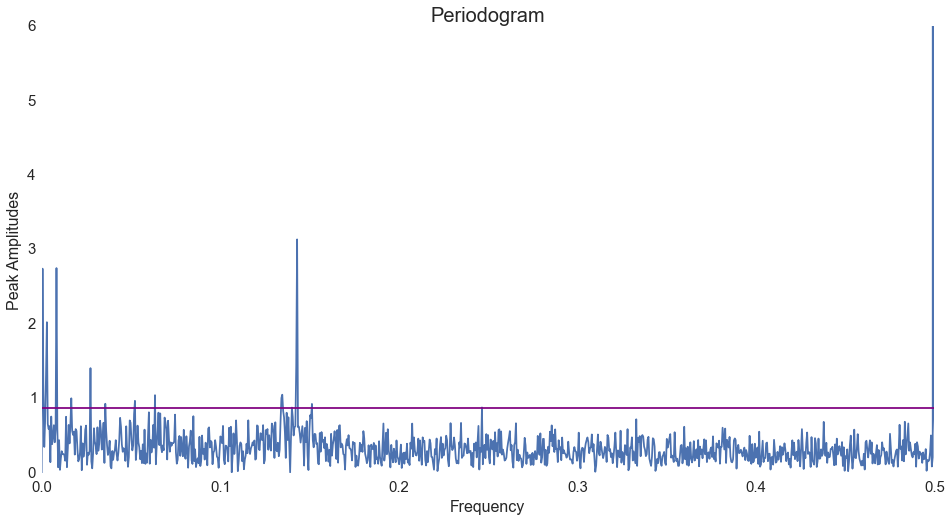

In [116]:
figure = plt.figure(figsize = (16,8))
plt.plot(harmonicDF['freq'], harmonicDF['peakAmp1'])
plt.ylim(0,6)
plt.xlim(0,.5)
plt.axhline(.875,0, color='purple')
plt.ylabel('Peak Amplitudes', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)
plt.tick_params(axis='both', labelsize=15)
plt.title('Periodogram', fontsize = 20);

In [117]:
index = pd.date_range('2000-01-01', periods=5479, freq='D')
waveDF = pd.DataFrame(mdates.date2num(index), columns=['time'])
waveDF['When Reported'] = index

In [118]:
peakDFsorted = peakDF.sort(['peakAmp1'],ascending=False);
amp1st = peakDFsorted['peakAmp1'][1:35]

In [119]:
amp1st

1755    3.136829
293     3.136829
17      2.751436
2031    2.751436
2047    2.743694
1       2.743694
2042    2.024052
6       2.024052
1756    1.440303
292     1.440303
56      1.406696
1992    1.406696
2043    1.301529
5       1.301529
2046    1.065440
2       1.065440
276     1.049869
1772    1.049869
1918    1.043391
130     1.043391
275     1.005942
1773    1.005942
34      1.001133
2014    1.001133
1941    0.966921
107     0.966921
73      0.927896
1975    0.927896
310     0.925668
1738    0.925668
1543    0.878055
505     0.878055
287     0.876601
1761    0.876601
Name: peakAmp1, dtype: float64

In [120]:
periods = []
for i in [293,17,6,292,56,5,2,276,130,275,34,107,73,310,505,287]:
    periods.append(1/harmonicDF['freq'][i])
periods

[6.9897610921501707,
 120.47058823529412,
 341.33333333333331,
 7.0136986301369859,
 36.571428571428569,
 409.60000000000002,
 1024.0,
 7.4202898550724639,
 15.753846153846155,
 7.4472727272727273,
 60.235294117647058,
 19.140186915887849,
 28.054794520547944,
 6.6064516129032258,
 4.0554455445544555,
 7.1358885017421603]

In [121]:
indices = [293,17,6,292,56,5,2,276,130,275,34,107,73,310,505,287]
k=1

for j in range(len(indices)):
    amp = harmonicDF['peakAmp1'][indices[j]]
    freq = harmonicDF['freq'][indices[j]]
    phi = harmonicDF['phase(rad)1'][indices[j]]
    damp=0
    
    waveDF['SineValues%d' %int(k)]= waveDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi, damp),axis=1)
    k+=1

In [122]:
interval1 = waveDF.copy()

In [123]:
del interval1['time']
del interval1['When Reported']

In [124]:
waveDF['agWave'] = (interval1.sum(axis=1))

In [125]:
wave1 = pd.Series(waveDF['agWave'],index=waveDF['When Reported'])
wave1[0:] = waveDF['agWave']+np.mean(z2TS[3431:5497])

In [126]:
wave2 = wave1[3431:5497]

In [127]:
z2TS2 = z2TS[3431:5497]

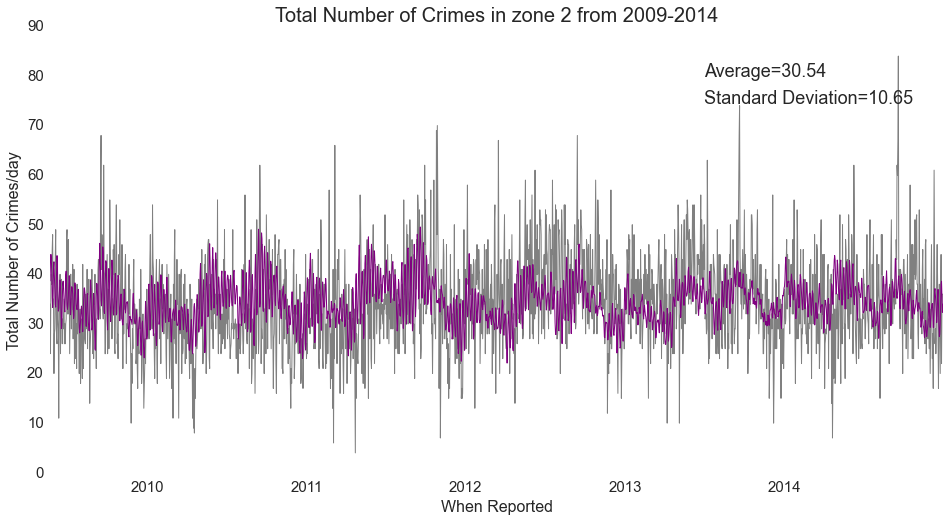

In [128]:
figure = plt.figure(figsize=(16,8))
z1plot =z2TS2.plot(linewidth=1, c='gray')
z1plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z1plot.set_xlabel('Day',fontsize=16)
z1plot.set_title('Total Number of Crimes in zone 2 from 2009-2014',fontsize=20)
z1plot.tick_params(axis='both', labelsize=15)
z1plot.text(0.8, 0.9,'Average=%.2f' %z1mean, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18)
z1plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z1std, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18);

wave2.plot(linewidth=1,c='purple');

In [129]:
waveDF.to_csv('C:/Users/flunk_000/Desktop/CalPoly/StakeOut/zone2.csv')

In [130]:
forecastRange = 2048+365

In [131]:
index = pd.date_range('2009-05-24', periods=forecastRange, freq='D')
forecastDF = pd.DataFrame(mdates.date2num(index), columns=['time'])
forecastDF['When Reported'] = index

In [132]:
indices = [293,17,6,292,56,5,2,276,130,275,34,107,73,310,505,287]
k=1

for j in range(len(indices)):
    amp = harmonicDF['peakAmp1'][indices[j]]
    freq = harmonicDF['freq'][indices[j]]
    phi = harmonicDF['phase(rad)1'][indices[j]]
    damp=0
    
    forecastDF['SineValues%d' %int(k)]= forecastDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi, damp),axis=1)
    k+=1

In [133]:
forecastInterval = forecastDF.copy()

In [134]:
del forecastInterval['time']
del forecastInterval['When Reported']

In [135]:
forecastDF['agWave'] = (forecastInterval.sum(axis=1))

In [136]:
len(forecastDF)-365

2048

In [137]:
forecastDF.to_csv('C:/Users/flunk_000/Desktop/CalPoly/StakeOut/zone2Forecast.csv')